In [23]:
import numpy as np
import pandas as pd
import re
import sys
sys.path.insert(0, "/home/user/project/python/reduce_nsp")
from nsp.utils import save_fig
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt

In [24]:
def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []
    weight_r = []
    
    for line in stdout.split("\n"):
        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            

            
    return energy, sign, time

In [28]:
import os
df = {}
folder_path = "/home/user/project/python/reduce_nsp/make_local/out/SS"
M = 240
lats = ["dimer_optim", "singlet"]

files = []
Js = np.arange(0.47, 0.48, 0.002)
T = np.logspace(-1.3, -1, num=15)
N = 100000; L = 8


In [29]:
for lat in lats:
    df[lat] = {}
    for J in Js:
        df[lat][np.round(J,3)] = {}
        for t in T:
            if lat is "dimer_optim":
                file_name = f"{lat}_L_[{L},{L}]_J_[{J:.3},1]_T_{t:.5}_N_{N}_M_{M}"
            else:
                file_name = f"{lat}_L_[{L},{L}]_J_[{J:.3},1]_T_{t:.5}_N_{N}"
            with open(folder_path+ "/" + file_name, "r") as f:
                a = f.read()
                try:
                    energy, sign, time = process_line(a)
                    # print(f"J={J}, T={t}, s = {sign[0]}")
                    df[lat][np.round(J,3)][t] = sign[0]
                except:
                    print(a)
                    print(file_name)

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_16404/811300861.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if lat is "dimer_optim":


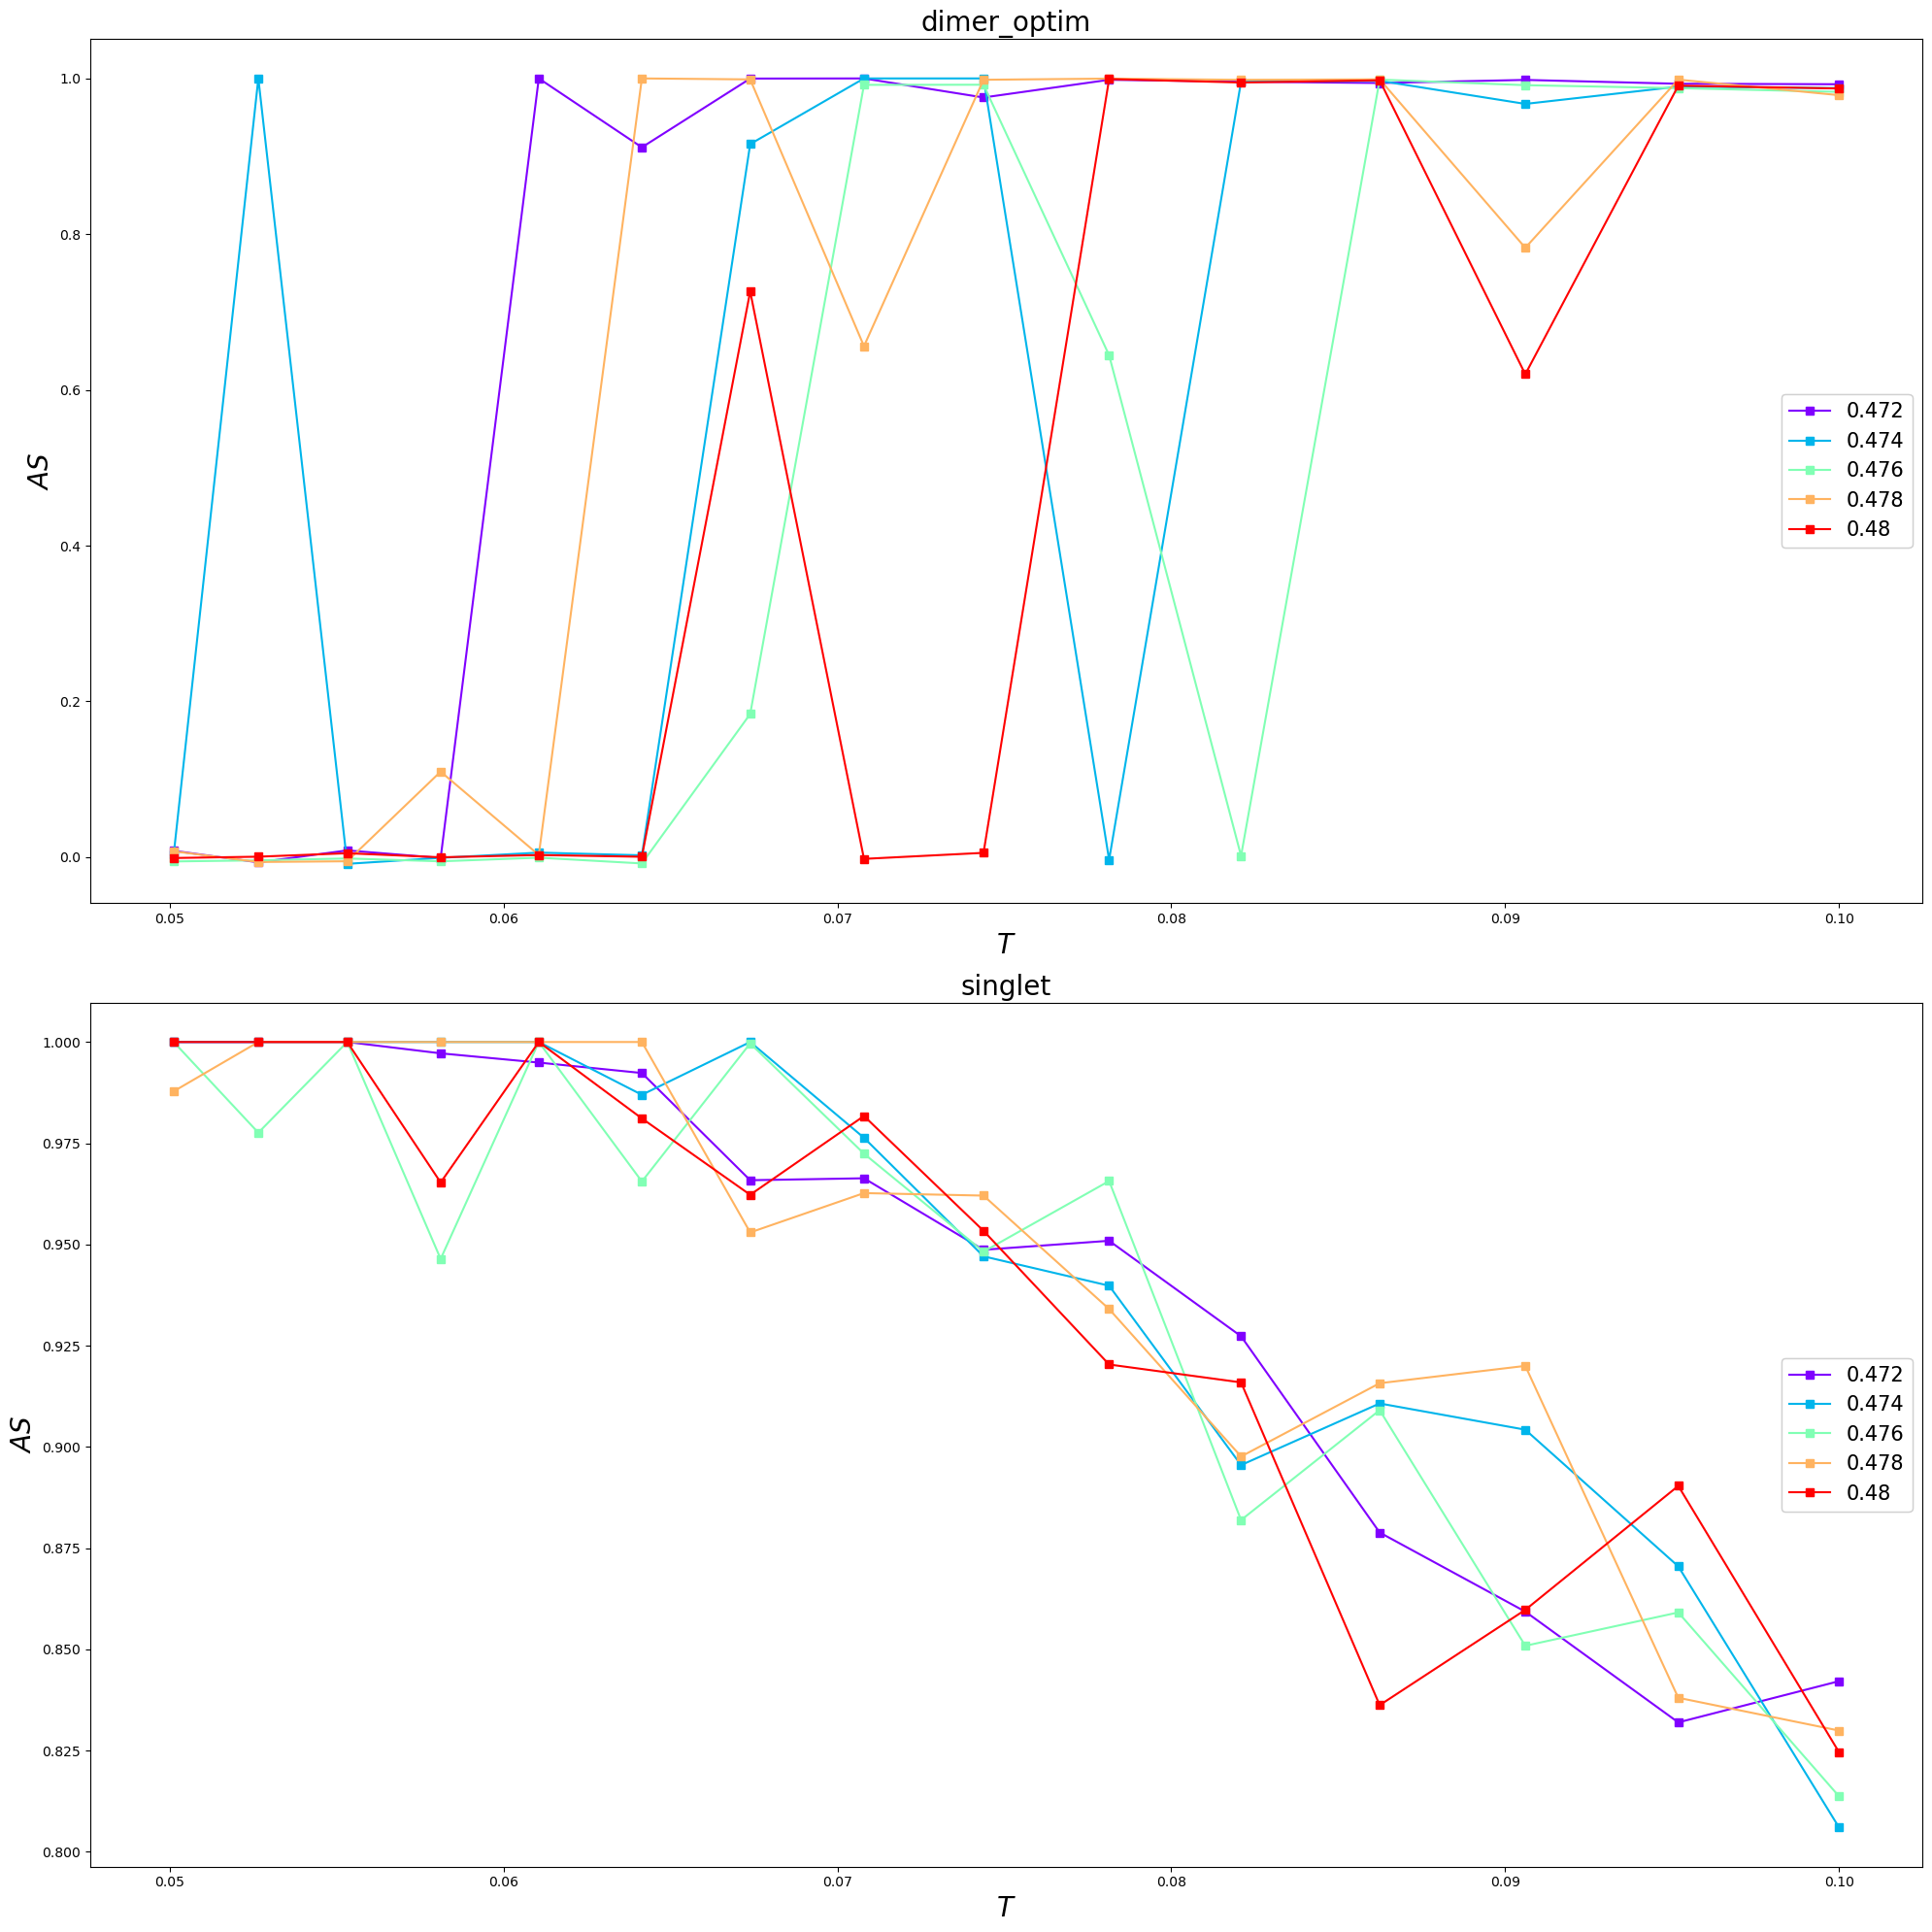

In [37]:
dfs = {lat : pd.DataFrame(df[lat]) for lat in lats}
for key in dfs.keys():
    dfs[key].columns = np.round(dfs[key].columns, 3)



fig, ax = plt.subplots(2, 1, figsize=(20, 20))
lat = "dimer_optim"
J_list = [0.47, 0.48]
gap = 1
p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
                        ax = ax[0], style='s-', colormap='rainbow')
leg = ax[0].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax[0].add_artist(leg)
ax[0].set_xlabel(r'$T$', fontsize=20)
ax[0].set_ylabel(r'$AS$', fontsize=20)
ax[0].set_title("dimer_optim", fontsize=20)

lat = "singlet"
p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
                        ax = ax[1], style='s-', colormap='rainbow')
leg = ax[1].legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax[1].add_artist(leg)
ax[1].set_xlabel(r'$T$', fontsize=20)
ax[1].set_ylabel(r'$AS$', fontsize=20)
ax[1].set_title("singlet", fontsize=20)
save_fig(fig,f"images/SS", f"L_{L}_J_[{J_list[0]:.3},{J_list[1]:.3},J]_T_[{T[0]:.3},{T[-1]:.3}]_gap_{Js[gap] - Js[0]:.2}", 400, overwrite = True)

Text(0.5, 1.0, 'compare')

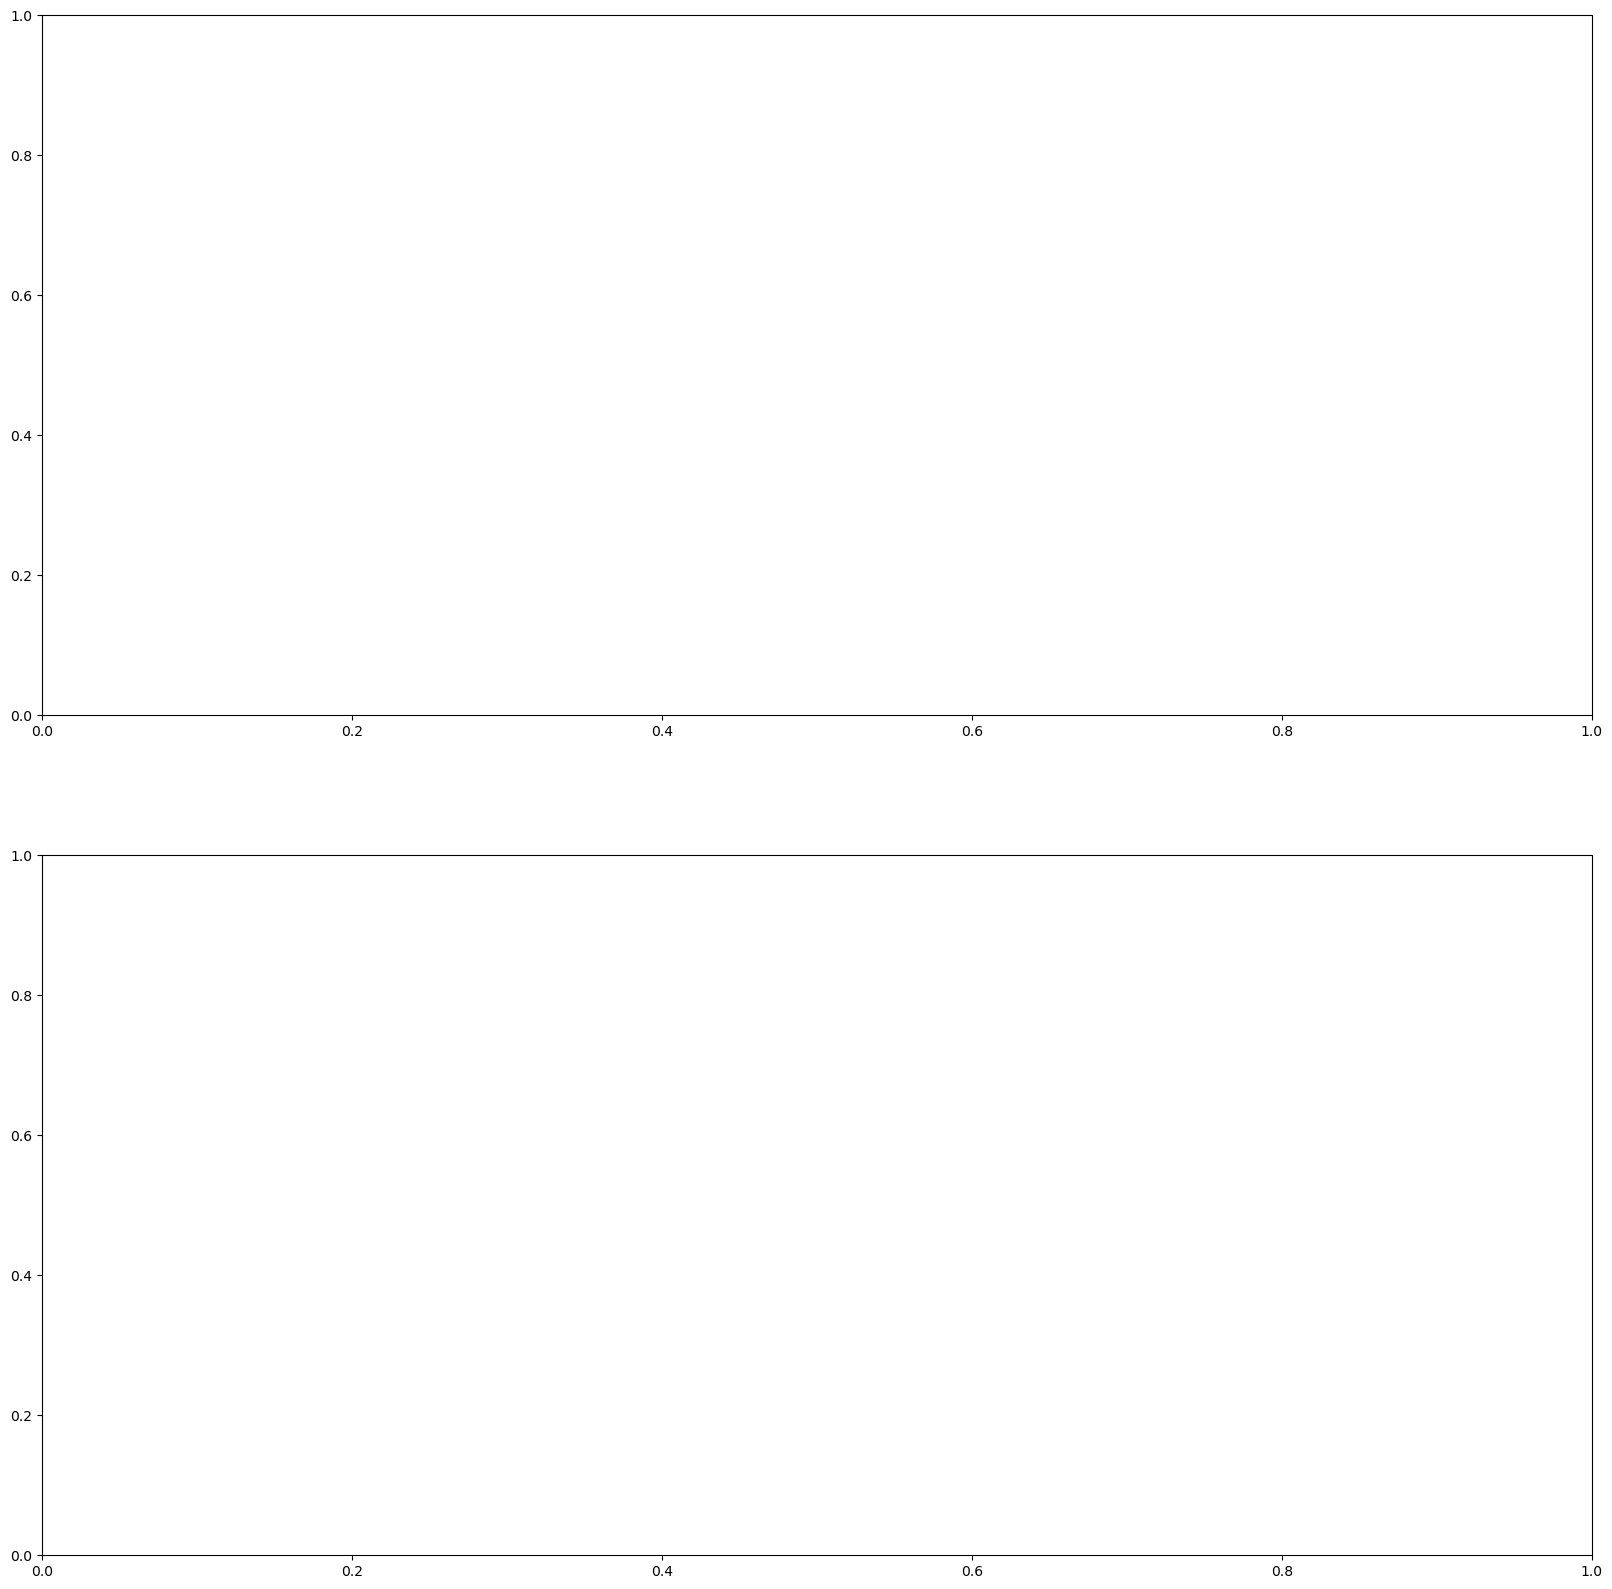

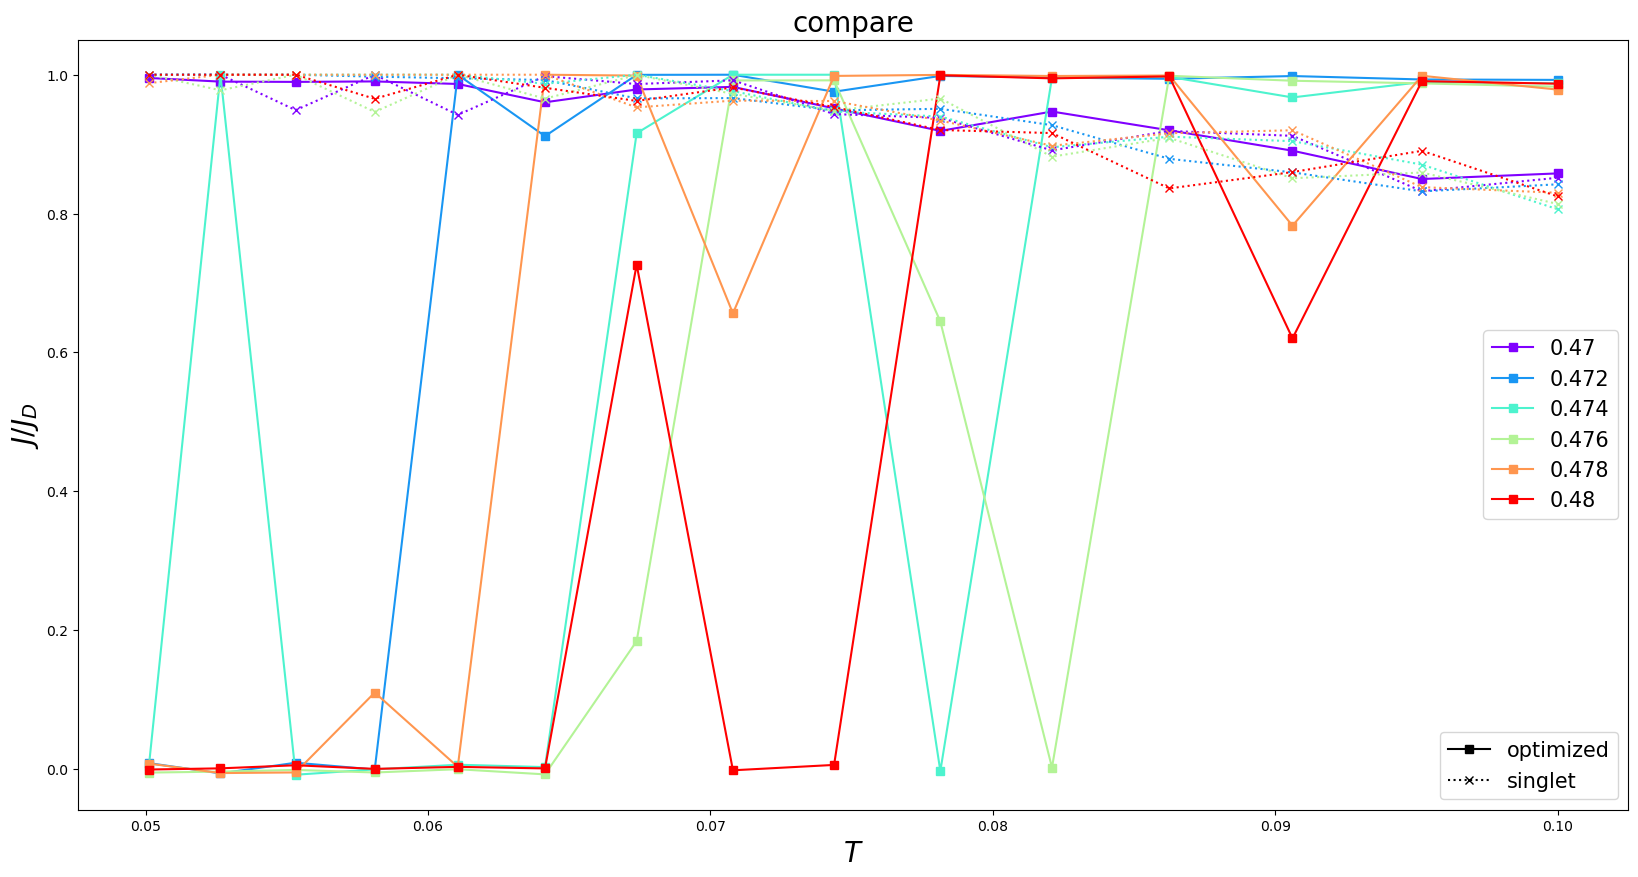

In [31]:

from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(20, 20))
lat = "dimer_optim"
# J_list = [0.4, 0.6]
# gap = 2

legend_elements = []
legend_elements.append(Line2D([0], [0],  color="black", marker = "s", linestyle="-", label = "optimized"))
legend_elements.append(Line2D([0], [0],  color="black", marker = "x", linestyle=":", label = "singlet"))



fig, ax = plt.subplots(1, 1, figsize=(20, 10))
lat = "dimer_optim"
p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
                        ax = ax, style='s-', colormap='rainbow')
leg = ax.legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
ax.add_artist(leg)

lat = "singlet"
p1 = dfs[lat].plot(y = [(elem) for elem in dfs[lat].columns[::gap] if J_list[0] < elem <= J_list[1]],
                        ax = ax, style = "x:", colormap='rainbow')
leg = ax.legend(handles=p1.legend().legendHandles, fontsize=15, loc="center right")
leg = ax.legend(handles=legend_elements, fontsize=15, loc="lower right")
ax.set_xlabel(r'$T$', fontsize=20)
ax.set_ylabel(r'$J / J_D$', fontsize=20)
ax.set_title("compare", fontsize=20)